# Experiment list :  Question No - 07

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape images to include channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# Create the CNN model
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output for dense layers
    layers.Flatten(),

    # Dense layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(train_images, train_labels,
                   epochs=10,
                   batch_size=64,
                   validation_split=0.2,
                   verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 71ms/step - accuracy: 0.6508 - loss: 0.9506 - val_accuracy: 0.8363 - val_loss: 0.4390
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 65ms/step - accuracy: 0.8364 - loss: 0.4477 - val_accuracy: 0.8698 - val_loss: 0.3545
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.8651 - loss: 0.3678 - val_accuracy: 0.8794 - val_loss: 0.3239
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.8820 - loss: 0.3276 - val_accuracy: 0.8870 - val_loss: 0.3028
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8886 - loss: 0.3011 - val_accuracy: 0.8940 - val_loss: 0.2826
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 66ms/step - accuracy: 0.8986 - loss: 0.2799 - val_accuracy: 0.8982 - val_loss: 0.2728
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.9050 - loss: 0.2611 - val_accuracy: 0.9018 - val_loss: 0.2688
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.9102 - loss: 0.2462 - 

In [5]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_accuracy:.4f}")

313/313 - 3s - 8ms/step - accuracy: 0.9065 - loss: 0.2707

Test accuracy: 0.9065


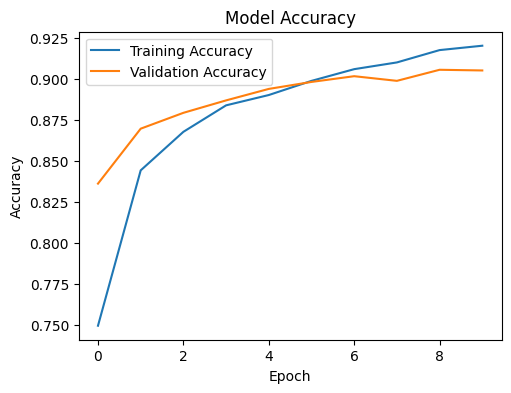

In [15]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

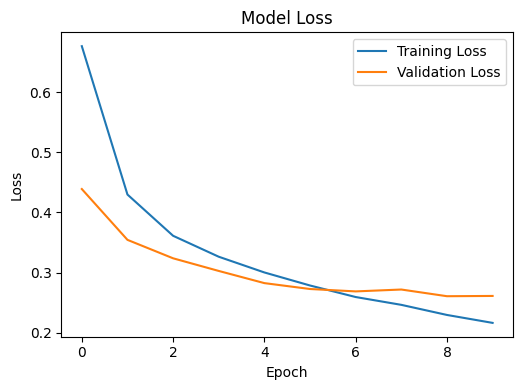

In [14]:
# Plot training history
plt.figure(figsize=(10, 4))

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


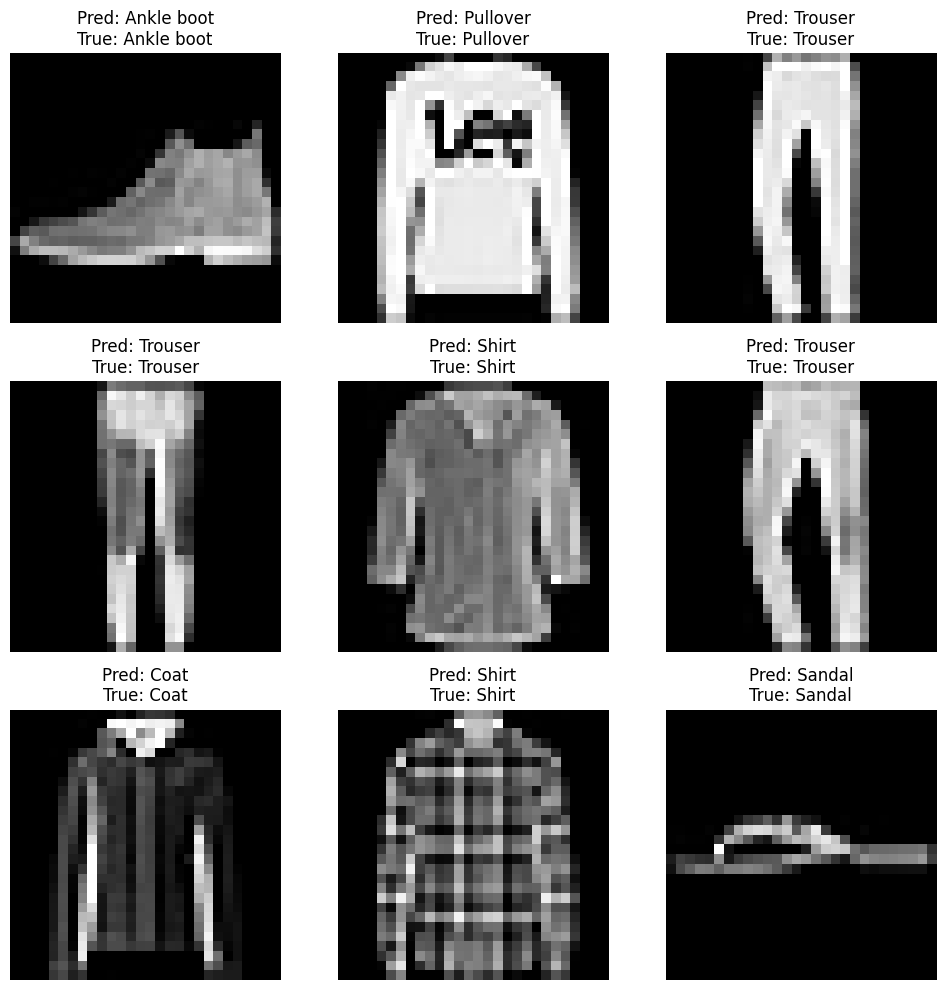

In [8]:
# Make predictions on test data
predictions = model.predict(test_images)

# Display example predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    plt.title(f'Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# Print classification report
from sklearn.metrics import classification_report
y_pred = np.argmax(predictions, axis=1)
print("\nClassification Report:")
print(classification_report(test_labels, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.84      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.88      0.84      0.86      1000
       Dress       0.92      0.89      0.91      1000
        Coat       0.83      0.89      0.86      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.71      0.75      0.73      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

